# **Aviation Recommendations**

## **Authors**:
Bobby Daly, DS; Em Jager, DS; and Paul Justafort, DS.

![image](https://github.com/pmjustafort/DSC-Phase1-Project-BEP/assets/137816262/b10f9a2d-5783-4c77-a521-64094b1e16ce)

## **Overview**
Our project involves analyzing aviation data from the National Transportation Safety Board (NTSB) aviation accident database, which contains information spanning from 1962 to 2022. By leveraging this rich dataset, our objective is to gain insights and knowledge that will inform decision-making processes in the aviation industry. We aim to assess trends, patterns, and key factors related to aviation accidents over the past six decades. Through this analysis, we will identify recurring themes, risk factors, and areas of improvement to enhance aviation safety and operational practices. 


## **Business Problem**
Our newly established company, BEP Aviation, is entering the aviation industry, specifically in the purchase and operation of airplanes. In embarking on this exciting venture, we understand the paramount importance of prioritizing safety and establishing a reliable and secure operation right from the outset. Recent aviation incidents, such as the Boeing 737 MAX crisis triggered by the crashes of Lion Air Flight 610 and Ethiopian Airlines Flight 302, have underscored the critical significance of safety in aviation operations. To ensure long-term success and sustainability, we are committed to implementing robust safety practices and procedures that prioritize the well-being of passengers, crew members, and all stakeholders involved. By thoroughly exploring and analyzing decades of aviation data, we aim to make informed decisions that further enhance our commitment to safety and operational excellence.

## **Data**
![image](https://github.com/pmjustafort/DSC-Phase1-Project-BEP/assets/137816262/c91e6b81-8c9d-4672-8a37-ebf45d3cace7)

The data utilized in this project is sourced from the National Transportation Safety Board (NTSB) aviation accident database. We narrowed this data down to approximately 85,000 aviation accidents recorded between 1980 and 2022 in the United States. This comprehensive dataset provides a rich resource for analyzing and exploring various aspects of aviation safety and accident patterns over a significant timeframe. Our main goal is to minimize the risk of your company experiencing a worst-case scenario, a fatality in an aviation accident. To do this, we focused on the relationship between fatalities and airplane make, engine type, and region of flight.

## Methods
We utilize the summation method to calculate the total sum of relevant values. Additionally, we harness the robust technique of time series analysis to explore and analyze the temporal patterns, trends, and relationships within aviation data over a specific period. This comprehensive approach allows us to gain valuable insights into the evolution and dynamics of the aviation industry.

## **Data Understanding**
Mitigating accidents is important, but when they do happen, fatalities represent the worst-case scenario. To ensure comprehensive insights and facilitate proactive risk mitigation, we have diligently filtered and thoroughly analyzed the available dataset. Our analysis focuses on examining the intricate relationship between fatalities and critical variables, including airplane make, engine type, and region of flight. By meticulously exploring these factors, we aim to uncover valuable patterns and trends that can empower your business to make informed decisions, enhance safety protocols, and effectively minimize potential risks and incidents.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import data and save to df
aviation_df = pd.read_csv('Data/Aviation_Data.csv')
state_codes_df = pd.read_csv('Data/USState_Codes.csv')

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
#Standardize column names
aviation_df = aviation_df.rename(columns = lambda x: x.replace(".", "_").lower())
aviation_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
aviation_df.isna().sum()

event_id                   1459
investigation_type            0
accident_number            1459
event_date                 1459
location                   1511
country                    1685
latitude                  55966
longitude                 55975
airport_code              40099
airport_name              37558
injury_severity            2459
aircraft_damage            4653
aircraft_category         58061
registration_number        2776
make                       1522
model                      1551
amateur_built              1561
number_of_engines          7543
engine_type                8536
far_description           58325
schedule                  77766
purpose_of_flight          7651
air_carrier               73700
total_fatal_injuries      12860
total_serious_injuries    13969
total_minor_injuries      13392
total_uninjured            7371
weather_condition          5951
broad_phase_of_flight     28624
report_status              7840
publication_date          16689
dtype: i

In [7]:
#Analyze weather_conditions
aviation_df['weather_condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: weather_condition, dtype: int64

In [8]:
#Standardize Unkown weather condition code to UNK
aviation_df['weather_condition'].loc[aviation_df['weather_condition']=='Unk']='UNK'

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
#Analyze Make column
aviation_df['make'].value_counts()

Cessna              22227
Piper               12029
CESSNA               4922
Beech                4330
PIPER                2841
                    ...  
Selby Dean              1
PIONTKOWSKI             1
Keeley/Tidd             1
DOUBLEDAY DONALD        1
JOHNSON JERRY           1
Name: make, Length: 8237, dtype: int64

In [10]:
#standardizing the names of the airplane makes by making them all lower case with first letter capitalized
aviation_df.loc[:, 'make'] = aviation_df['make'].str.lower().str.capitalize()

In [11]:
#Confirm that change worked
aviation_df['make'].value_counts()

Cessna           27149
Piper            14870
Beech             5372
Boeing            2745
Bell              2722
                 ...  
Smith allen          1
Corley               1
Carlesimo            1
Catchot angus        1
Chilian              1
Name: make, Length: 7587, dtype: int64

In [12]:
#Check top 50 makes with most accidents
aviation_df['make'].value_counts()[:50]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Mooney                             1334
Robinson                           1230
Grumman                            1172
Bellanca                           1045
Hughes                              932
Schweizer                           773
Air tractor                         691
Aeronca                             636
Mcdonnell douglas                   608
Maule                               589
Champion                            519
Stinson                             439
Aero commander                      429
De havilland                        422
Luscombe                            414
Aerospatiale                        388
North american                      383
Taylorcraft                         383
Rockwell                            355
Hiller                              348


In [13]:
#Replacing Robinson names that were inconsistent in airplane make
aircraft_dict = {
    'Robinson helicopter company' : 'Robinson helicopter',
    'Robinson' : 'Robinson helicopter',
    'Robinson Helicopter' : 'Robinson helicopter'}
aviation_df.loc[:, 'make'] = aviation_df['make'].replace(aircraft_dict)

In [14]:
#Confirm that Robinson name change worked
aviation_df['make'].value_counts()[:50]

Cessna                            27149
Piper                             14870
Beech                              5372
Boeing                             2745
Bell                               2722
Robinson helicopter                1654
Mooney                             1334
Grumman                            1172
Bellanca                           1045
Hughes                              932
Schweizer                           773
Air tractor                         691
Aeronca                             636
Mcdonnell douglas                   608
Maule                               589
Champion                            519
Stinson                             439
Aero commander                      429
De havilland                        422
Luscombe                            414
Aerospatiale                        388
North american                      383
Taylorcraft                         383
Rockwell                            355
Hiller                              348


In [15]:
#create new column with state initials to easily filter by State
aviation_df['state']=aviation_df['location'].str.upper().str[-2:]

In [16]:
aviation_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,state
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH


In [17]:
aviation_df['state'].value_counts()[:50]

CA    9033
TX    5913
FL    5825
AK    5672
CO    3104
AZ    2834
WA    2613
IL    2384
NY    2128
MI    2030
GA    2023
IA    1831
OH    1823
OR    1811
PA    1791
NC    1661
MO    1566
WI    1563
IN    1534
AR    1526
MN    1456
ID    1436
LA    1402
NM    1358
UT    1336
VA    1275
OK    1240
NV    1236
AL    1216
NJ    1170
TN    1108
KS    1105
MT    1050
MA    1015
SC     974
ND     838
MD     815
MS     813
NE     742
WY     739
KY     650
ME     515
CT     502
HI     499
SD     446
WV     394
AN     389
NH     368
DA     347
OM     307
Name: state, dtype: int64

In [18]:
#narrow down to states within State Codes b/c that's where majority of data is
aviation_df = aviation_df.loc[aviation_df['state'].isin(state_codes_df['Abbreviation'])]

In [19]:
aviation_df['state'].value_counts()

CA    9033
TX    5913
FL    5825
AK    5672
CO    3104
AZ    2834
WA    2613
IL    2384
NY    2128
MI    2030
GA    2023
IA    1831
OH    1823
OR    1811
PA    1791
NC    1661
MO    1566
WI    1563
IN    1534
AR    1526
MN    1456
ID    1436
LA    1402
NM    1358
UT    1336
VA    1275
OK    1240
NV    1236
AL    1216
NJ    1170
TN    1108
KS    1105
MT    1050
MA    1015
SC     974
ND     838
MD     815
MS     813
NE     742
WY     739
KY     650
ME     515
CT     502
HI     499
SD     446
WV     394
NH     368
AS     295
VT     241
RI     158
DE     119
PR     114
GM      44
DC      42
AO      33
PO      17
GU       8
VI       6
Name: state, dtype: int64

In [20]:
len(aviation_df['state'].value_counts())

58

In [21]:
#Group into regions of country to better analyze regions
#Regions from National Geographic: https://education.nationalgeographic.org/resource/united-states-regions/
regions_dict = {
    "CT": "Northeast",
    "ME": "Northeast",
    "MA": "Northeast",
    "NH": "Northeast",
    "NJ": "Northeast",
    "NY": "Northeast",
    "PA": "Northeast",
    "RI": "Northeast",
    "VT": "Northeast",
    "MD": "Northeast",
    "DC": "Northeast",
    "AL": "Southeast",
    "AR": "Southeast",
    "FL": "Southeast",
    "GA": "Southeast",
    "KY": "Southeast",
    "LA": "Southeast",
    "MS": "Southeast",
    "NC": "Southeast",
    "SC": "Southeast",
    "TN": "Southeast",
    "TX": "Southeast",
    "VA": "Southeast",
    "WV": "Southeast",
    "OK": "Southeast",
    "DE": "Southeast",
    "IL": "Midwest",
    "IN": "Midwest",
    "IA": "Midwest",
    "KS": "Midwest",
    "MI": "Midwest",
    "MN": "Midwest",
    "MO": "Midwest",
    "NE": "Midwest",
    "ND": "Midwest",
    "OH": "Midwest",
    "SD": "Midwest",
    "WI": "Midwest",
    "AZ": "Southwest",
    "NM": "Southwest",
    "AK": "West",
    "CA": "West",
    "CO": "West",
    "HI": "West",
    "ID": "West",
    "MT": "West",
    "NV": "West",
    "OR": "West",
    "UT": "West",
    "WA": "West",
    "WY": "West",
    "AO": "Atlantic Ocean",
    "AS": "Pacific Ocean",
    "PR": "Caribbean Sea/Gulf of Mexico", #combined b/c not as many data points as other regions
    "GU": "Pacific Ocean",
    "PO": "Pacific Ocean",
    "GM": "Caribbean Sea/Gulf of Mexico",
    "VI": "Caribbean Sea/Gulf of Mexico"
}

#Make sure dictionary includes Region for every state
print(len(regions_dict))
aviation_df['region'] = aviation_df['state'].map(lambda x: regions_dict[x])

58






In order to recommend safety, we want to mitigate bad outcomes. The injury_severity column and all columns including 'injuries' jumped out as most relevant for initial scanning. 

In [22]:
#Analyze injury_severity column
aviation_df['injury_severity'].value_counts()

Non-Fatal     65945
Fatal(1)       5998
Fatal          4502
Fatal(2)       3589
Incident       2011
              ...  
Fatal(88)         1
Fatal(70)         1
Fatal(153)        1
Fatal(26)         1
Fatal(33)         1
Name: injury_severity, Length: 84, dtype: int64

Many values have "Fatal" and then the number of Fatalities. This is duplicate entry as that data should be in the total_fatal_injuries column. 

In [23]:
#Check to confirm numbers in injury_severity line up with numbers in total_fatal_injuries
aviation_df[['injury_severity','total_fatal_injuries']].head(20)

,injury_severity,total_fatal_injuries
0,Fatal(2),2.0
1,Fatal(4),4.0
2,Fatal(3),3.0
3,Fatal(2),2.0
4,Fatal(1),1.0
5,Non-Fatal,NaN
6,Fatal(4),4.0
7,Non-Fatal,0.0
8,Non-Fatal,0.0
9,Non-Fatal,0.0


In [24]:
#Find how many NAs in this column
percent_na_inj = aviation_df['injury_severity'].isna().sum()/len(aviation_df['injury_severity'])*100
percent_na_inj

0.6027621722846442

2.7% is a lot of data to wipe out, so instead we decided to change any NaN value to "Not Applicable"

In [25]:
#Change NAs in this column to Not Applicable
aviation_df['injury_severity'].loc[aviation_df['injury_severity'].isna()] = 'Not Applicable'

#Check to confirm the replacement worked
aviation_df['injury_severity'].isna().sum()

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0

In [26]:
#Remove Nulls in injury columns and replace with 0's as this most likely means there were 0 injuries for the accident.
aviation_df['total_fatal_injuries'].fillna(value=0,inplace=True)
aviation_df['total_minor_injuries'].fillna(value=0,inplace=True) 
aviation_df['total_serious_injuries'].fillna(value=0,inplace=True) 
aviation_df['total_uninjured'].fillna(value=0,inplace=True) 

#Check to confirm fill worked
print(aviation_df['total_fatal_injuries'].isna().sum())
print(aviation_df['total_minor_injuries'].isna().sum())
print(aviation_df['total_serious_injuries'].isna().sum())
print(aviation_df['total_uninjured'].isna().sum())

0
0
0
0


In [27]:
#Change all values with Fatal(#) to just Fatal b/c # Fatal are taken care of in total_fatalaties column
aviation_df['injury_severity'].loc[aviation_df['injury_severity'].str.contains("Fatal\(.*\)")] = 'Fatal'

In [28]:
#Check to confirm the Fatal change worked
aviation_df[['injury_severity','total_fatal_injuries']].head(20)

,injury_severity,total_fatal_injuries
0,Fatal,2.0
1,Fatal,4.0
2,Fatal,3.0
3,Fatal,2.0
4,Fatal,1.0
5,Non-Fatal,0.0
6,Fatal,4.0
7,Non-Fatal,0.0
8,Non-Fatal,0.0
9,Non-Fatal,0.0


In [29]:
aviation_df['investigation_type'].value_counts()

Accident    82407
Incident     3033
Name: investigation_type, dtype: int64

## Focus on Accidents

The investigation_type showed us that 69 entries were entered just with dates as the investigation type. 
Accident has many more entries than Incident. 
To narrow our focus and remove a variable, we decided to analyze only flights that were recorded as Accidents.

In [30]:
#Create subset of accidents
accident_df = aviation_df.loc[aviation_df['investigation_type']=='Accident']

In [31]:
#Confirm that new df has 85015 entries
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82407 entries, 0 to 90347
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                82407 non-null  object 
 1   investigation_type      82407 non-null  object 
 2   accident_number         82407 non-null  object 
 3   event_date              82407 non-null  object 
 4   location                82407 non-null  object 
 5   country                 82360 non-null  object 
 6   latitude                32562 non-null  object 
 7   longitude               32553 non-null  object 
 8   airport_code            47882 non-null  object 
 9   airport_name            50341 non-null  object 
 10  injury_severity         82407 non-null  object 
 11  aircraft_damage         81194 non-null  object 
 12  aircraft_category       29032 non-null  object 
 13  registration_number     81786 non-null  object 
 14  make                    82378 non-null

### Visual Analysis

We decided to get quick and easy visuals of the categories we thought have the best chance of being correlated with accidents.

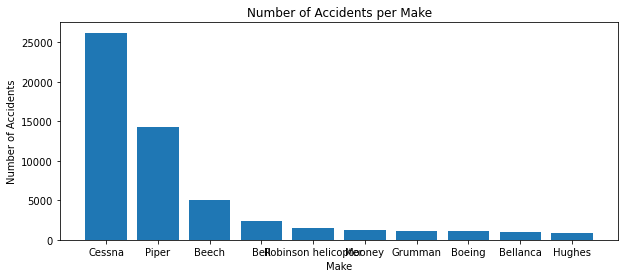

In [32]:
#Graph accidents vs 10 most common make of plane
fig, ax = plt.subplots(figsize=(10,4))

x = accident_df['make'].value_counts().nlargest(10).index
y = accident_df['make'].value_counts().nlargest(10).values

ax.set(xlabel="Make", ylabel="Number of Accidents",title='Number of Accidents per Make')


ax.bar(x,y);

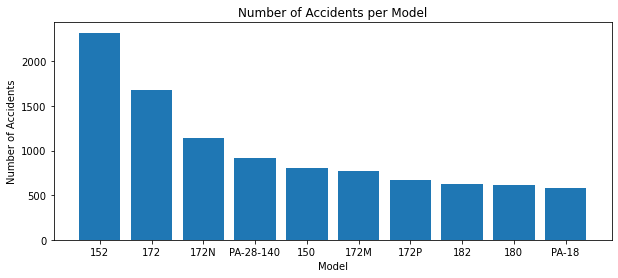

In [33]:
#Graph accidents vs 10 most common models of plane
fig, ax = plt.subplots(figsize=(10,4))

x = accident_df['model'].value_counts().nlargest(10).index
y = accident_df['model'].value_counts().nlargest(10).values

ax.set(xlabel="Model", ylabel="Number of Accidents",title='Number of Accidents per Model')

ax.bar(x,y);

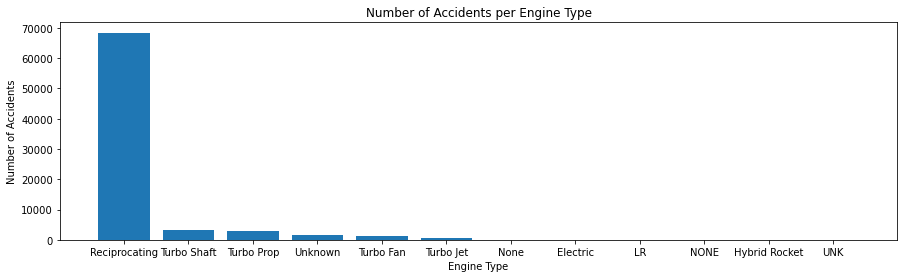

In [34]:
#Graph accidents vs engine type of plane
fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['engine_type'].value_counts().index
y = accident_df['engine_type'].value_counts().values

ax.set(xlabel="Engine Type", ylabel="Number of Accidents",title='Number of Accidents per Engine Type')

ax.bar(x,y);

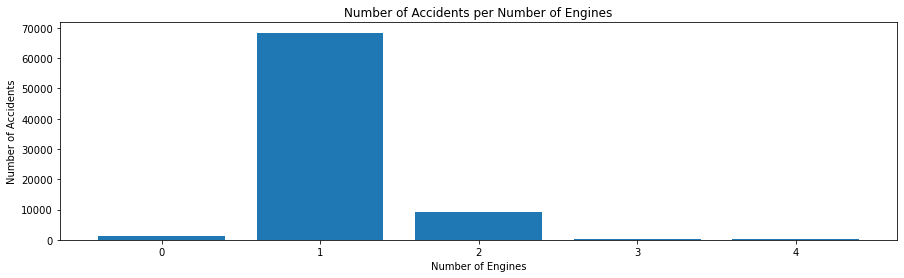

In [35]:
#Graph accidents vs most common number of engines
fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['number_of_engines'].value_counts().nlargest().index
y = accident_df['number_of_engines'].value_counts().nlargest().values

ax.set(xlabel="Number of Engines", ylabel="Number of Accidents",title='Number of Accidents per Number of Engines')

ax.bar(x,y);

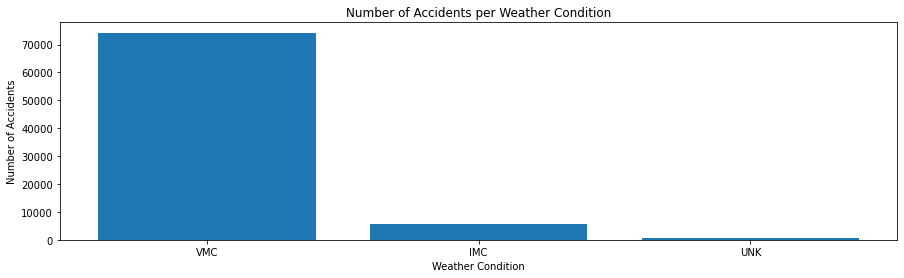

In [36]:
#Graph accidents vs weather conditions
#VMC stands for visual meteorological conditions and IMC stands for instrument meteorological conditions
fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['weather_condition'].value_counts().nlargest().index
y = accident_df['weather_condition'].value_counts().nlargest().values

ax.set(xlabel="Weather Condition", ylabel="Number of Accidents",title='Number of Accidents per Weather Condition')

ax.bar(x,y);

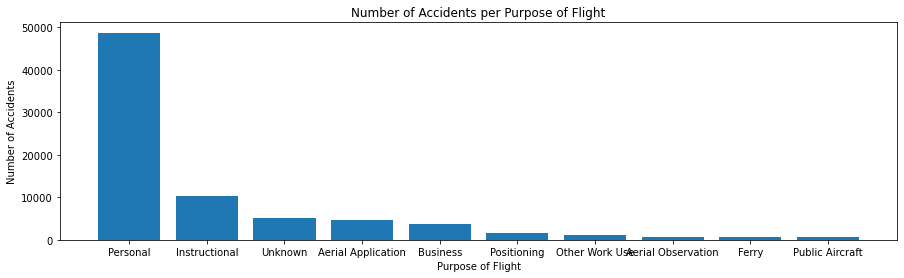

In [37]:
#Graph accidents vs 10 most common purpose of flight
fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['purpose_of_flight'].value_counts().nlargest(10).index
y = accident_df['purpose_of_flight'].value_counts().nlargest(10).values

ax.set(xlabel="Purpose of Flight", ylabel="Number of Accidents",title='Number of Accidents per Purpose of Flight')

ax.bar(x,y);

<BarContainer object of 10 artists>

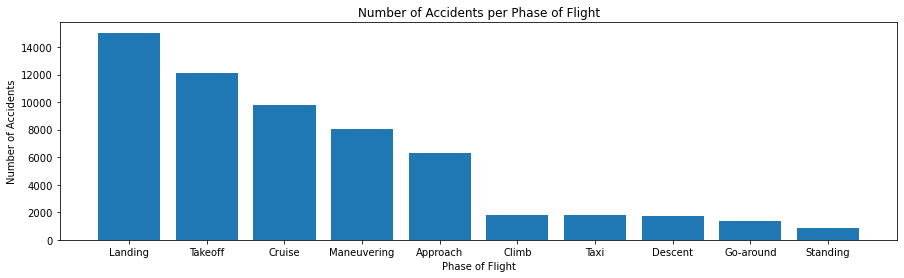

In [38]:
#Graph accidents vs phase of flight

fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['broad_phase_of_flight'].value_counts().nlargest(10).index
y = accident_df['broad_phase_of_flight'].value_counts().nlargest(10).values

ax.set(xlabel="Phase of Flight", ylabel="Number of Accidents",title='Number of Accidents per Phase of Flight')

ax.bar(x,y)

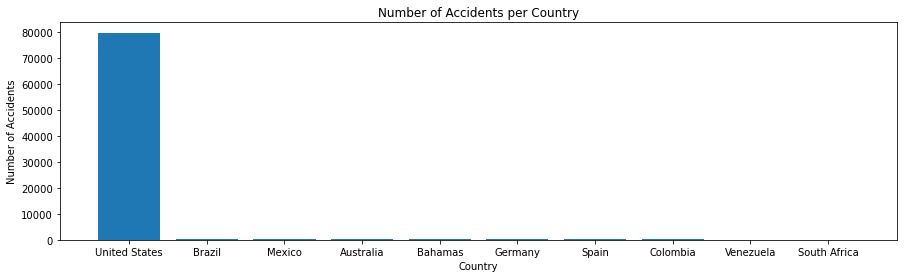

In [39]:
#Plot accidents vs Top 10 countries 
fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['country'].value_counts().nlargest(10).index
y = accident_df['country'].value_counts().nlargest(10).values

ax.set(xlabel="Country", ylabel="Number of Accidents",title='Number of Accidents per Country')

ax.bar(x,y);

In [40]:
accident_df['country'].value_counts()

United States       79826
Brazil                285
Mexico                283
Australia             194
Bahamas               193
                    ...  
Corsica                 1
Papua New Guinea        1
Liberia                 1
Zambia                  1
Qatar                   1
Name: country, Length: 85, dtype: int64

In [41]:
#Narrow dataset down to only accidents in US as this is where majority of data lies
accident_df = accident_df.loc[accident_df['country']=='United States']

In [42]:
#Confirm subsetting worked
accident_df.shape

(79826, 33)

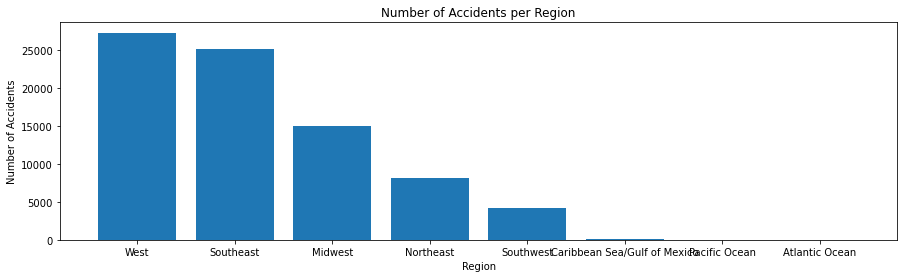

In [43]:
#Plot accidents vs Regions
fig, ax = plt.subplots(figsize=(15,4))

x = accident_df['region'].value_counts().index
y = accident_df['region'].value_counts().values

ax.set(xlabel="Region", ylabel="Number of Accidents",title='Number of Accidents per Region')

ax.bar(x,y);

From the quick overviews given in the above bar graphs, we decided to focus on the Make, the Engine Type, and the Region. We decided on these three categories because they have ample data and each could have a unique correlation with accidents.

## Focus on Fatalities

In [44]:
#Getting top 20 airplane makes for below make bar chart
make_count = accident_df['make'].value_counts()
top_20_make = make_count.head(20)
make_subset = accident_df[accident_df['make'].isin(top_20_make.index)]
make_subset.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,state,region
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID,West
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA,West
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007,VA,Southeast
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,OH,Midwest
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,MN,Midwest


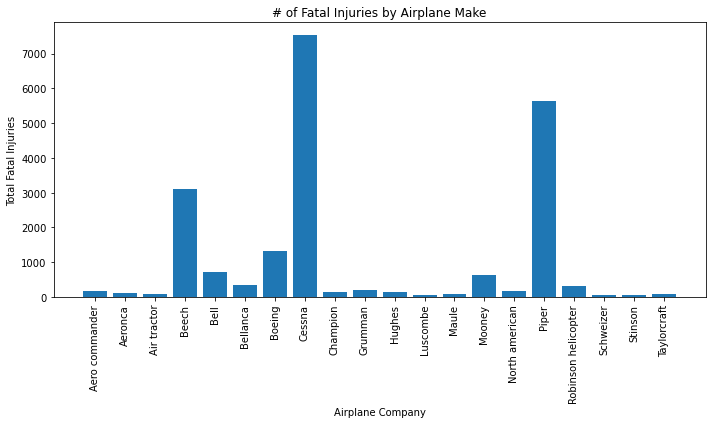

In [45]:
#graph of fatalities by make
airplane_make = make_subset.groupby('make')['total_fatal_injuries'].sum()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(airplane_make.index, airplane_make.values)

ax.set_xlabel('Airplane Company')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title('# of Fatal Injuries by Airplane Make')

plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically

plt.tight_layout()
plt.show()

The bar graphs are helpful for an overview, but we also wanted to see how aspects changed over time. In order to do that, it's helpful to have a column just for year

In [46]:
#Create a year column that contains just the year as an integer
accident_df['year'] = accident_df['event_date'].str[:4].astype(int)
accident_df['year'].value_counts().index.sort_values()

Int64Index([1948, 1962, 1974, 1977, 1979, 1981, 1982, 1983, 1984, 1985, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020, 2021, 2022],
           dtype='int64')

In [47]:
#Group sum of total fatalities, minor injuries, serious injuries, and uninjured by year
sum_fatalities_per_year = accident_df.groupby('year')['total_fatal_injuries'].agg(['sum'])

sum_minor_injuries_per_year = accident_df.groupby('year')['total_minor_injuries'].agg(['sum'])

sum_serious_injuries_per_year = accident_df.groupby('year')['total_serious_injuries'].agg(['sum'])

sum_uninjured_per_year = accident_df.groupby('year')['total_uninjured'].agg(['sum'])

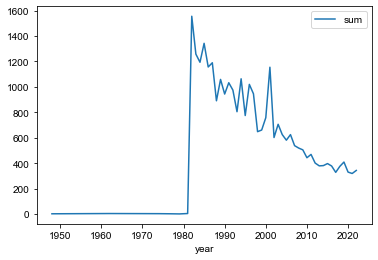

In [48]:
#Graph total fatalities per year
ax = sns.lineplot(data=sum_fatalities_per_year)
sns.set(rc={'figure.figsize':(15,4)})
plt.show()

From the graph, we noticed that there are many fatalities in the dataset. 
As that is the worst case scenario in an accident, we decided to hone in on that. 
We also noticed that there is not much data for that category before 1980.

In [49]:
#Subset the data from 1980 onwards b/c this is wher majority of data lies for fatalities
accident_df = accident_df.loc[accident_df['year']>=1980]

In [50]:
#Confirm subset worked
accident_df['year'].value_counts().index.sort_values()

Int64Index([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64')

In [51]:
#Export accident_df to csv for further analysis in Tableau
accident_df.to_csv('Data/cleaned_aviation.csv')

## Results
**Fatalities Associated with Each Specific Airplane Make.**

In analyzing the airplane make, summation analysis simply showed that some Makes have large amounts of fatalities. 

![Fatalaties by Make (Summation)](https://github.com/pmjustafort/DSC-Phase1-Project-BEP/assets/137816262/aef42ed4-57c5-4e64-92ca-65a9f72acd16)


However, once we plotted this over time, we observed that certain Makes, despite having a significant number of fatalities over the past 40 years have exhibited a consistent decrease in those numbers.

![Fatalities by Make (Line)](https://github.com/pmjustafort/DSC-Phase1-Project-BEP/assets/137816262/4723356c-b053-44b2-b1c8-4e29f5d5b1b1)

**Fatalities Associated with Engine Type.**

In our analysis, we focused on the two most prevalent engine types in the dataset: the Reciprocating engine and the Turbofan engine. The Reciprocating engines exhibited a higher number of fatalities compared to Turbofan engines. However, they were also much more widespread across different airplane makes. Notably, we observed a downward trend among airplane makes utilizing reciprocating engines, indicating a decrease in fatalities over time. On the other hand, fatal accidents involving Turbofan engines were sporadic before 2005, but a consistent decrease in fatal accidents was observed thereafter. This trend may be attributed to the widespread popularity of Turbofan engines, potentially driving engineers to refine and perfect this engine type, resulting in improved safety measures and a reduction in fatal accidents.


![Fatalities by Engine Type](https://github.com/pmjustafort/DSC-Phase1-Project-BEP/assets/137816262/e496b9fe-3c04-4ebe-861b-a45d1ef12353)


**Fatalities By US Region.**

Upon grouping the states by region, we observed distinct patterns regarding fatalities. The Southwest and Northeast regions stood out with the fewest recorded fatalities, while the Southeast and West regions exhibited the highest number of fatalities.

![Fatalaties by Region (Summation)](https://github.com/pmjustafort/DSC-Phase1-Project-BEP/assets/137816262/838d1360-773e-4258-bbf2-48fdae0741c2)

 
## **Conclusions**
Based on the analysis conducted in this project, the following observations can be made:
Airplane Make: By examining the decrease in fatalities over time as an indicator of improved airplane safety, Cessna and Piper stand out. Despite having higher numbers of fatalities from airplane crashes compared to other airplanes, both Cessna and Piper have shown a consistent decline in fatalities since 1980. This trend suggests advancements in the safety of their planes.

Engine Type: Reciprocating and Turbo Fan engines have been associated with the highest number of fatalities from airplane crashes. However, it is important to note that these engine types are widely used, particularly Turbo Fan engines in commercial airplanes. Analyzing the data over time reveals a decline in fatalities, indicating potential technological advancements and improved safety. Notably, Turbo Fan engines have consistently demonstrated very low fatalities since 2005, highlighting their reliability and safety record.

U.S. Region of Flight: Our analysis reveals that the Northeast region has exhibited relatively lower numbers of fatalities from plane crashes compared to other regions. With major international and domestic air travel hubs in cities like New York, Boston, and Washington, D.C., the Northeast region is a significant market for air travel and offers potential investment opportunities.

These findings highlight the positive trends in airplane safety, particularly in the context of specific airplane makes, engine types, and U.S. regions of flight. They provide valuable insights for industry stakeholders, enabling them to make informed decisions regarding airplane selection, engine choices, and investment considerations.

## **Next Steps**
Based on the project findings, there are several potential next steps to further enhance the analysis of airplane safety and investment. These steps include:

Gathering Additional Data: To make the recommendations more robust, it would be beneficial to obtain more data on the market share of each make of airplane. This would provide greater certainty in determining if a higher rate of fatalities is due to inherent safety issues or simply a result of a larger number of planes of that make in service.

Comparing Fatalities to Successful Flights: By comparing the number of successful flights of each company to the crash data, we can identify types of airplanes that are underrepresented in the crash data, indicating exceptional safety records. This analysis would help highlight specific aircraft options that have a strong track record of safety.

Exploring Weather Patterns: Incorporating data on weather patterns by region could provide insights into how different weather conditions may impact the number of plane crashes. This analysis would contribute to understanding whether certain regions have lower crash rates due to more favorable weather conditions.

Considering Flight Types: Expanding the analysis to include more variation in the types of flights, such as commercial or private, and the size of airplanes, would help refine recommendations for entering the aviation industry. This would allow for tailored insights based on the specific flight contexts and aircraft types.

By pursuing these next steps and further exploring the suggested variables, the analysis of airplane safety and investment could be strengthened, enabling more informed decision-making for companies in the aviation industry.

## Thank You! 

Thank you for taking the time to review our recommendations. <br>
We hope this information helps and we look forward to working with you more on the next steps.

Sincerely,<br>
Bobby Daly, Em Jager, Paul Justafort <br>
BEP Aviation